# Random Forests

Como funciona o random forest ?

In [17]:
# Processamento dos dados
import numpy  as np
import pandas as pd

In [18]:
# Visualização dos dados
import matplotlib.pyplot as plt
import seaborn           as sns
%matplotlib inline

In [19]:
# Seleção dos modelos
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV

In [20]:
# Armazenamento externo de arquivos
from sklearn.externals import joblib

In [21]:
# Métricas de avaliação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

## Carregamento dos datasets balanceados

In [22]:
# Conjuntos de treinamento
# Conjunto 1
conjunto1_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_1.csv')
conjunto1_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_1.csv')

# Conjunto 2
conjunto2_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_2.csv')
conjunto2_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_2.csv')

# Conjunto 3
conjunto3_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_3.csv')
conjunto3_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_3.csv')

# Conjunto 4
conjunto4_train        = pd.read_csv('Data/datasets-balanceados/train_data_b_4.csv')
conjunto4_train_target = pd.read_csv('Data/datasets-balanceados/train_target_b_4.csv')

In [23]:
# Conjuntos de teste
# Conjunto 1
conjunto1_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_1.csv')
conjunto1_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_1.csv')

# Conjunto 2
conjunto2_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_2.csv')
conjunto2_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_2.csv')

# Conjunto 3
conjunto3_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_3.csv')
conjunto3_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_3.csv')

# Conjunto 4
conjunto4_test        = pd.read_csv('Data/datasets-balanceados/test_data_b_4.csv')
conjunto4_test_target = pd.read_csv('Data/datasets-balanceados/test_target_b_4.csv')

## Carregamento dos datasets desbalanceados

In [24]:
# Leitura dos Datasets desbalanceados

# Conjuntos de treinamento

# Conjunto 1
conjunto1_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_1.csv')
conjunto1_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_1.csv')

# Conjunto 2
conjunto2_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_2.csv')
conjunto2_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_2.csv')

# Conjunto 3
conjunto3_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_3.csv')
conjunto3_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_3.csv')

# Conjunto 4
conjunto4_train_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/train_data_4.csv')
conjunto4_train_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/train_target_4.csv')

In [25]:
# Conjuntos de teste
# Conjunto 1
conjunto1_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_1.csv')
conjunto1_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_1.csv')

# Conjunto 2
conjunto2_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_2.csv')
conjunto2_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_2.csv')

# Conjunto 3
conjunto3_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_3.csv')
conjunto3_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_3.csv')

# Conjunto 4
conjunto4_test_desbalanceado        = pd.read_csv('Data/datasets-desbalanceados/test_data_4.csv')
conjunto4_test_target_desbalanceado = pd.read_csv('Data/datasets-desbalanceados/test_target_4.csv')

## Pré-processamento dos dados

### Remoção de colunas inúteis

In [26]:
# Lista de csvs
df_data_balanceado        = [conjunto1_train, conjunto2_train ,conjunto3_train ,conjunto4_train,
                               conjunto1_test, conjunto2_test  ,conjunto3_test  ,conjunto4_test]

df_target_balanceado      = [conjunto1_train_target, conjunto2_train_target, conjunto3_train_target, conjunto4_train_target,
                              conjunto1_test_target, conjunto2_test_target , conjunto3_test_target , conjunto4_test_target]

df_data_desbalanceado     = [conjunto1_train_desbalanceado, conjunto2_train_desbalanceado, conjunto3_train_desbalanceado, conjunto4_train_desbalanceado,
                              conjunto1_test_desbalanceado,  conjunto2_test_desbalanceado,  conjunto3_test_desbalanceado, conjunto4_test_desbalanceado]

df_target_desbalanceado   = [conjunto1_train_target_desbalanceado, conjunto2_train_target_desbalanceado, conjunto3_train_target_desbalanceado, conjunto4_train_target_desbalanceado,
                              conjunto1_test_target_desbalanceado,  conjunto2_test_target_desbalanceado,  conjunto3_test_target_desbalanceado, conjunto4_test_target_desbalanceado]

In [27]:
# Remoção das colunas ids
for df_index in range(0,8):
    # Dataset balanceado
    df_data_balanceado[df_index].drop('id',axis=1,inplace=True)
    df_target_balanceado[df_index].drop('id',axis=1,inplace=True)
    
    # Dataset desbalanceado
    df_data_desbalanceado[df_index].drop('id',axis=1,inplace=True)
    df_target_desbalanceado[df_index].drop('id',axis=1,inplace=True)

In [28]:
# Transformação das features categóricas em dummy variables, utilizando get_dummies

def get_dummies_features(df):
    ''' Função utilizada para a codificação de features categóricas de um dataframe em features binárias'''
    output = pd.DataFrame(index = df.index)

    # Verifica cada feature, transformando somente as features categóricas/object
    for col, col_data in df.iteritems():

        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        output = output.join(col_data)
    
    return output

In [29]:
# Convertendo as features presentes no dataframes em dummies :

# Datasets balanceados
# Conjunto de treinamento
conjunto1_train = get_dummies_features(conjunto1_train)
conjunto2_train = get_dummies_features(conjunto2_train)
conjunto3_train = get_dummies_features(conjunto3_train)
conjunto4_train = get_dummies_features(conjunto4_train)

# Conjunto de teste
conjunto1_test = get_dummies_features(conjunto1_test)
conjunto2_test = get_dummies_features(conjunto2_test) 
conjunto3_test = get_dummies_features(conjunto3_test)
conjunto4_test = get_dummies_features(conjunto4_test)

# Datasets desbalanceados
conjunto1_train_desbalanceado = get_dummies_features(conjunto1_train_desbalanceado)
conjunto2_train_desbalanceado = get_dummies_features(conjunto2_train_desbalanceado)
conjunto3_train_desbalanceado = get_dummies_features(conjunto3_train_desbalanceado)
conjunto4_train_desbalanceado = get_dummies_features(conjunto4_train_desbalanceado)

# Conjunto de teste
conjunto1_test_desbalanceado = get_dummies_features(conjunto1_test_desbalanceado)
conjunto2_test_desbalanceado = get_dummies_features(conjunto2_test_desbalanceado) 
conjunto3_test_desbalanceado = get_dummies_features(conjunto3_test_desbalanceado)
conjunto4_test_desbalanceado = get_dummies_features(conjunto4_test_desbalanceado)

## Treinamento

- 4 Cenários para cada estratégia: 
    -
    -
    -
    -
- Métrica utilizada para os datasets balanceados: acurácia
- Métrica utilizada para os datasets desbalanceados: F-Score e ROC AUC

<div align="center">
No algoritmo k-NN, temos como hiperparâmetro a quantidade k de vizinhos próximos que serão utilizados para a classificação das instâncias do dataset. Primeiramente, devemos realizar uma busca pelo melhor parâmetro, e após esse processo, realizar o treinamento do modelo para o valor k ótimo. Abaixo, os 4 cenários são verificados.
</div>

In [30]:
# importanto o classificador
from sklearn.ensemble import RandomForestClassifier as RF
clf_rf = RF(max_depth=6)

### Cenários para os datasets balanceados

In [31]:
# Teste base: Verificando o funcionamento correto do modelo para as configurações padrões: K = 5
clf_rf.fit(conjunto1_train,conjunto1_train_target.earnings)
prediction_conjunto1 = clf_rf.predict(conjunto1_test)
print('Acurácia para o conjunto 1: {:.2f}'.format(accuracy_score(conjunto1_test_target.earnings,prediction_conjunto1,normalize=True)))

clf_rf.fit(conjunto2_train,conjunto2_train_target.earnings)
prediction_conjunto2 = clf_rf.predict(conjunto2_test)
print('Acurácia para o conjunto 2: {:.2f}'.format(accuracy_score(conjunto2_test_target.earnings,prediction_conjunto2,normalize=True)))

clf_rf.fit(conjunto3_train,conjunto3_train_target.earnings)
prediction_conjunto3 = clf_rf.predict(conjunto3_test)
print('Acurácia para o conjunto 3: {:.2f}'.format(accuracy_score(conjunto3_test_target.earnings,prediction_conjunto3,normalize=True)))

clf_rf.fit(conjunto4_train,conjunto4_train_target.earnings)
prediction_conjunto4 = clf_rf.predict(conjunto4_test)
print('Acurácia para o conjunto 4: {:.2f}'.format(accuracy_score(conjunto4_test_target.earnings,prediction_conjunto4,normalize=True)))

Acurácia para o conjunto 1: 0.83
Acurácia para o conjunto 2: 0.82
Acurácia para o conjunto 3: 0.82
Acurácia para o conjunto 4: 0.80


### Busca pelo hiperparâmetro

- Max Depth

Fase de treinamento:


Fase de teste:

In [40]:
def validation_graph_acc(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    train_scores_mean = np.mean(scores_treino   , axis=1)
    train_scores_std  = np.std (scores_treino   , axis=1)
    test_scores_mean  = np.mean(scores_validacao, axis=1)
    test_scores_std   = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('Acurácia para n árvores',fontsize=20)
    plt.xlabel('Quantidade de árvores',fontsize=20)
    plt.ylabel('Acurácia',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, train_scores_mean, label="Acurácia no treinamento",color="darkorange", lw=lw)
    plt.fill_between(param_range, (train_scores_mean - train_scores_std),(train_scores_mean + train_scores_std), alpha=0.2,color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Acurácia na validação cruzada",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.legend(loc="best",fontsize='xx-large')
    plt.show()

In [68]:
def validation_graph_roc(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    train_scores_mean = np.mean(scores_treino   , axis=1)
    train_scores_std  = np.std (scores_treino   , axis=1)
    test_scores_mean  = np.mean(scores_validacao, axis=1)
    test_scores_std   = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('ROC AUC para n árvores ',fontsize=20)
    plt.xlabel('Quantidade de árvores',fontsize=20)
    plt.ylabel('ROC AUC',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, train_scores_mean, label="Acurácia no treinamento",color="darkorange", lw=lw)
    plt.fill_between(param_range, (train_scores_mean - train_scores_std),(train_scores_mean + train_scores_std), alpha=0.2,color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="ROC AUC na validação cruzada",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.legend(loc="best",fontsize='xx-large')
    plt.show()

In [62]:
def validation_graph_f1(model,X,y,hyperparameter,grid_search,k_folds,score,jobs=1):
    ''' Cria a curva de validação, para busca do hiperparâmetro ótimo'''

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    scores_treino, scores_validacao = validation_curve(model,
                                                       X=X,
                                                       y=y,
                                                       param_name=hyperparameter,
                                                       param_range=grid_search,
                                                       cv=k_folds,
                                                       scoring=score,
                                                       n_jobs=jobs)
    
    # Estatísticas do treino
    train_scores_mean = np.mean(scores_treino   , axis=1)
    train_scores_std  = np.std (scores_treino   , axis=1)
    test_scores_mean  = np.mean(scores_validacao, axis=1)
    test_scores_std   = np.std (scores_validacao, axis=1)

    # Estilo do sns
    sns.set_style('whitegrid')

    # Parâmetros
    param_range = grid_search
    lw = 2

    # Ajuste dos subplots
    plt.figure(figsize=(30,8))
    plt.title('F1-score para n árvores ',fontsize=20)
    plt.xlabel('Quantidade de árvores',fontsize=20)
    plt.ylabel('F1-score',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid(True)

    plt.plot(param_range, train_scores_mean, label="Acurácia no treinamento",color="darkorange", lw=lw)
    plt.fill_between(param_range, (train_scores_mean - train_scores_std),(train_scores_mean + train_scores_std), alpha=0.2,color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Score F1 na validação cruzada",color="navy", lw=lw)
    plt.fill_between(param_range, (test_scores_mean - test_scores_std),(test_scores_mean + test_scores_std), alpha=0.2,color="navy", lw=lw)
    plt.legend(loc="best",fontsize='xx-large')
    plt.show()
    

### Dataset 1

O dataset 1 balanceado possui

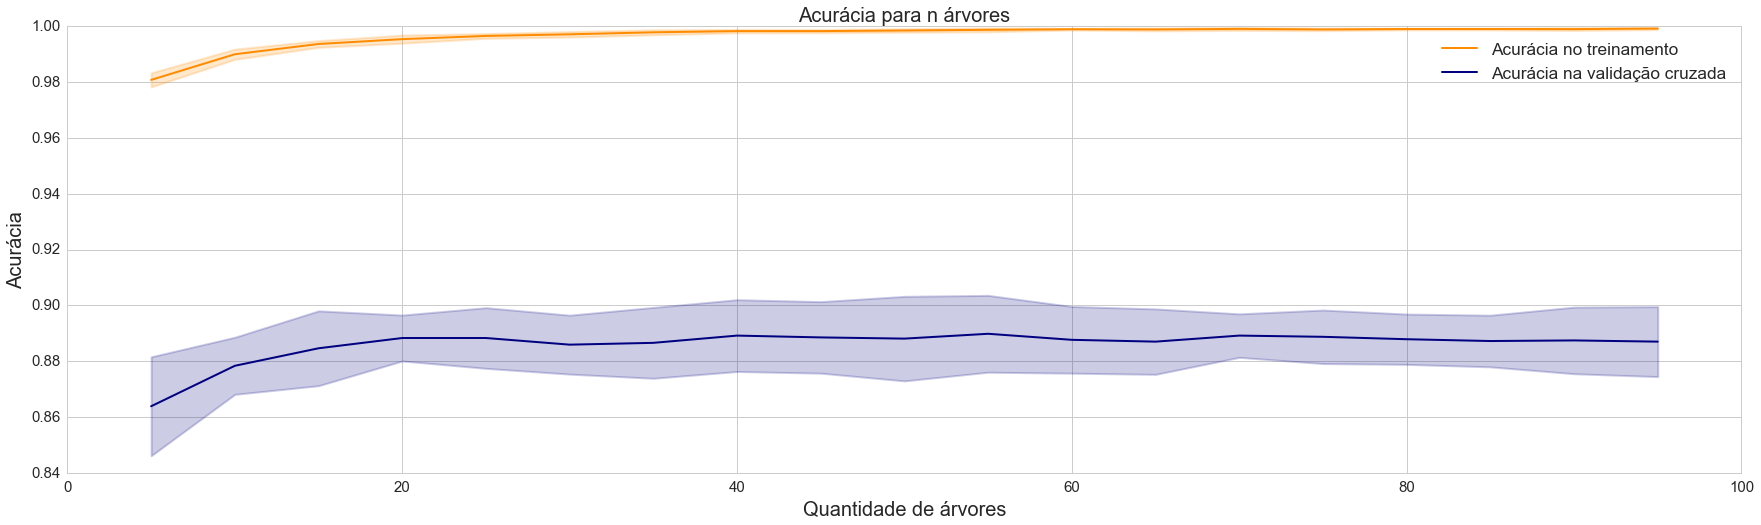

In [46]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=RF(max_depth=25),X=conjunto1_train,y=conjunto1_train_target.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='accuracy',jobs=-1)

In [47]:
# Busca do melhor parâmetro utilizando gridSearchCV
cross_val_bal_1 = cross_val_score(RF(n_estimators=20),conjunto1_test,conjunto1_test_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_1)

[ 0.89912281  0.86842105  0.88157895  0.92105263  0.89380531  0.82743363
  0.85840708  0.88938053  0.88938053  0.89823009]


### Dataset 2

O dataset 2 balanceado possui

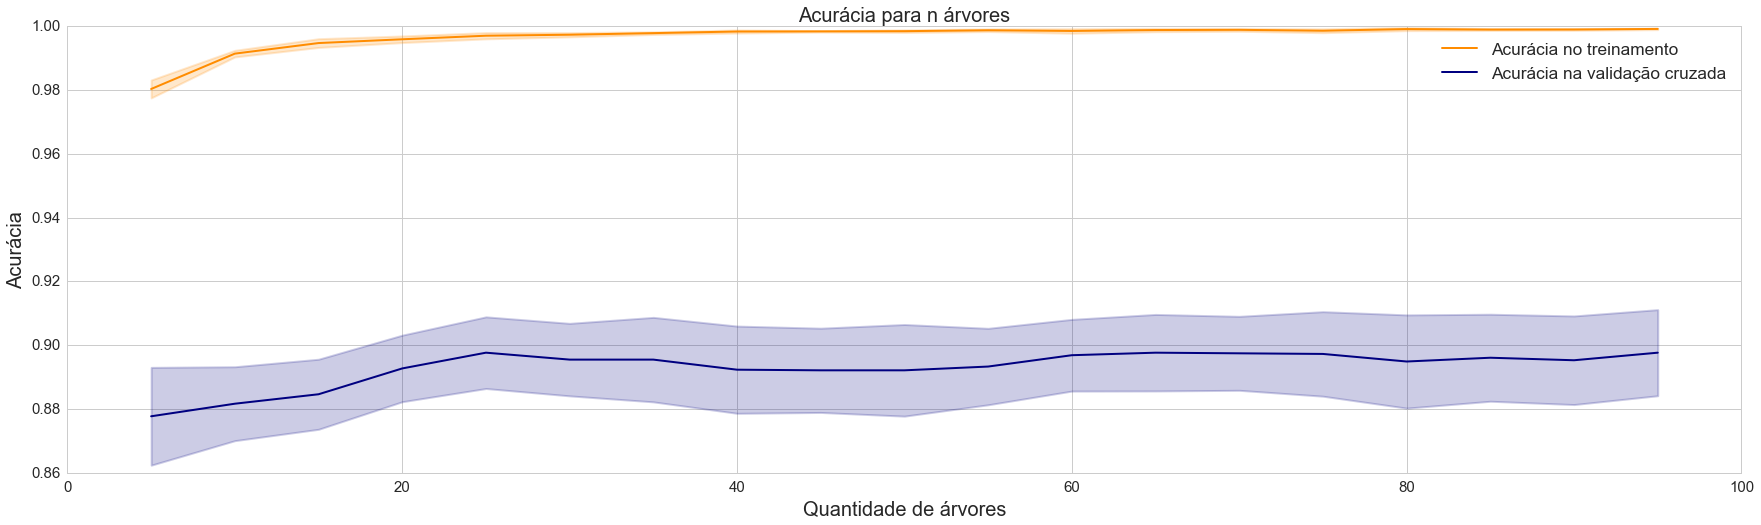

In [48]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=RF(max_depth=25),X=conjunto2_train,y=conjunto2_train_target.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='accuracy',jobs=-1)

In [55]:
# acurácia no conjunto de teste
cross_val_bal_2 = cross_val_score(RF(n_estimators=25),conjunto2_test,conjunto2_test_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_2)

[ 0.93495935  0.87398374  0.91869919  0.86178862  0.92622951  0.88934426
  0.88934426  0.84836066  0.88934426  0.9057377 ]


### Dataset 3

O dataset 3 balanceado possui

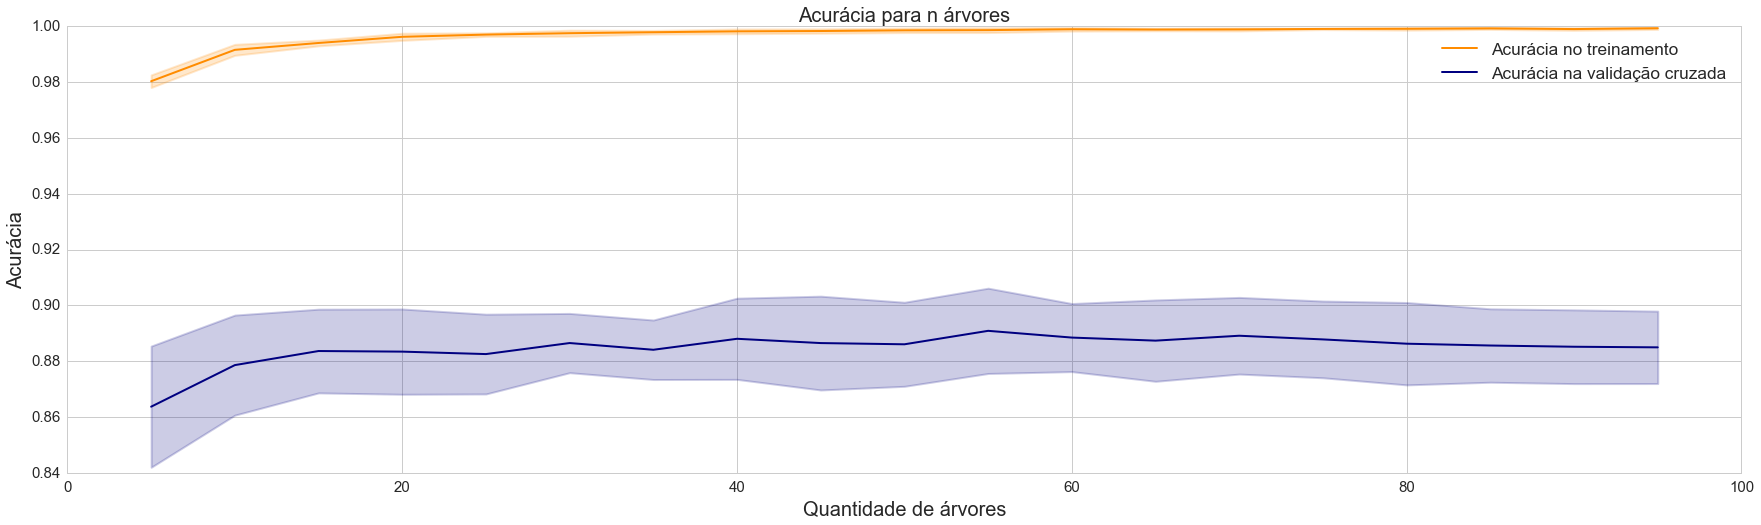

In [49]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=RF(max_depth=25),X=conjunto3_train,y=conjunto3_train_target.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='accuracy',jobs=-1)

In [51]:
# acurácia no conjunto de teste
cross_val_bal_3 = cross_val_score(RF(n_estimators=55),conjunto3_test,conjunto3_test_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_3)

[ 0.91810345  0.87931034  0.90948276  0.93103448  0.89224138  0.90517241
  0.91810345  0.9137931   0.94396552  0.87068966]


### Dataset 4

O dataset 4 balanceado possui

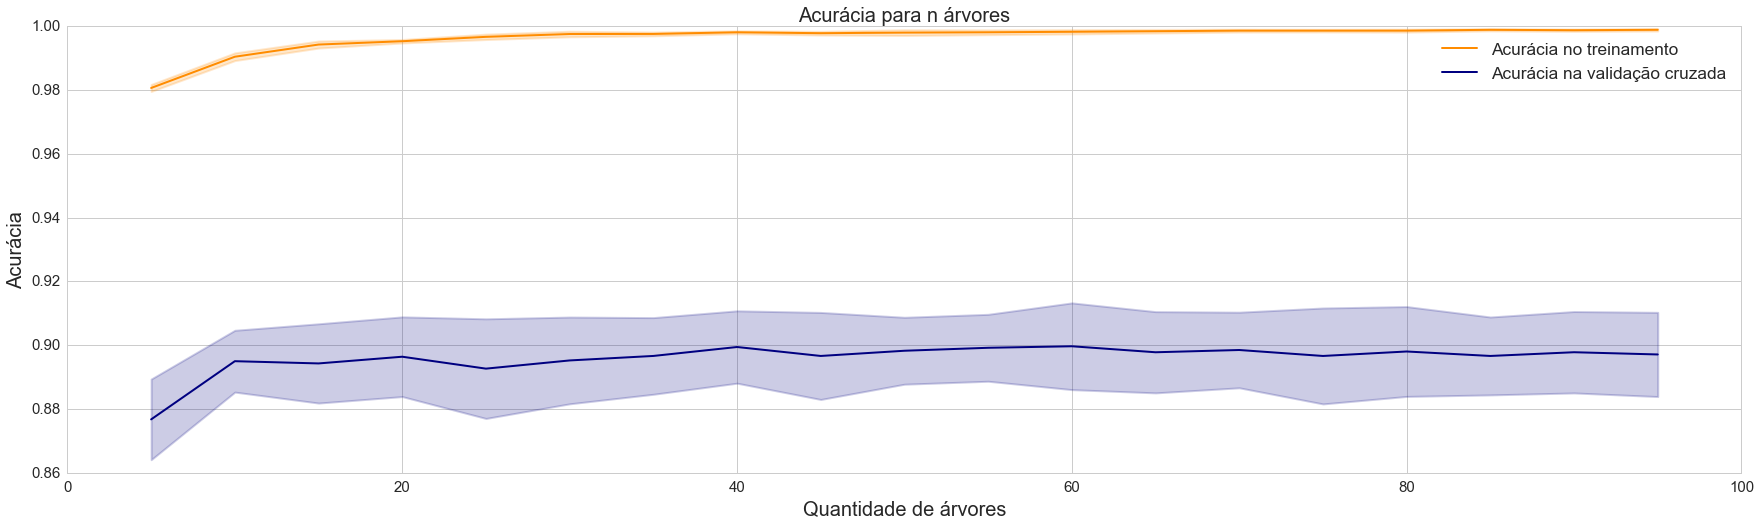

In [52]:
# Busca do melhor hiperparâmetro
validation_graph_acc(model=RF(max_depth=25),X=conjunto4_train,y=conjunto4_train_target.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='accuracy',jobs=-1)

In [53]:
# acurácia no conjunto de teste
cross_val_bal_4 = cross_val_score(RF(n_estimators=40),conjunto4_test,conjunto4_test_target.earnings,cv=10,scoring='accuracy')
print(cross_val_bal_4)

[ 0.85981308  0.89252336  0.89252336  0.92056075  0.87850467  0.94392523
  0.92056075  0.91121495  0.85514019  0.92523364]


### Avaliação dos modelos para cada cenário

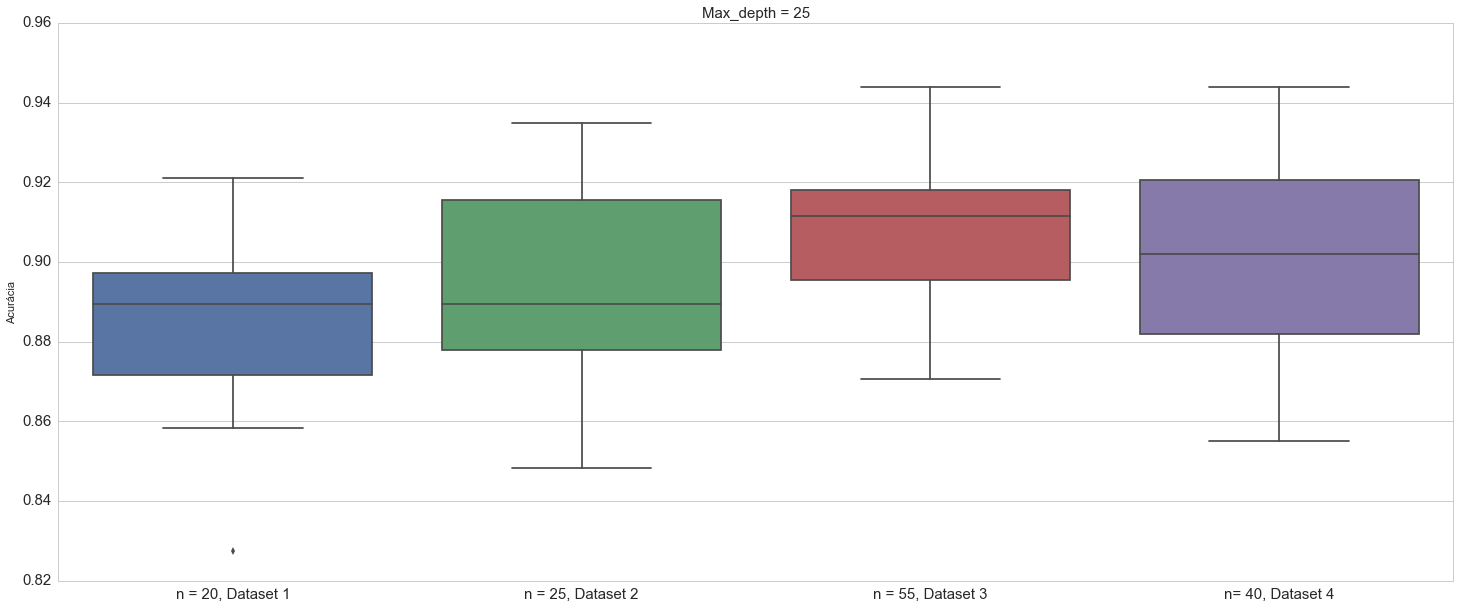

In [58]:
modelos_balanceados = [cross_val_bal_1, cross_val_bal_2, cross_val_bal_3, cross_val_bal_4]
labels = ['n = 20, Dataset 1', 'n = 25, Dataset 2', 'n = 55, Dataset 3', 'n= 40, Dataset 4']
plt.figure(figsize=(25,10))
sns.boxplot(data=modelos_balanceados)
plt.xticks(list(range(0,4)),labels,fontsize=15)
plt.yticks(fontsize=15)
plt.title('Max_depth = 25',fontsize=15)
plt.ylabel('Acurácia')
plt.show()

Falar sobre acurácia e outliers!!! Com outliers, pontos distantes são difíceis de predizer, assim o método 3 foi bom! Escrever mais depois sobre...

### Cenários para os datasets desbalanceado

In [60]:
# Teste base: Verificando o funcionamento correto do modelo para as configurações padrões: K = 5
clf_rf.fit(conjunto1_train_desbalanceado,conjunto1_train_target_desbalanceado.earnings)
prediction_conjunto1 = clf_rf.predict(conjunto1_test_desbalanceado)
print('F1 para o conjunto 1: {:.2f}'.format(f1_score(conjunto1_test_target_desbalanceado.earnings,prediction_conjunto1)))
print('ROC AUC para o conjunto 1: {:.2f}'.format(roc_auc_score(conjunto1_test_target_desbalanceado.earnings,prediction_conjunto1)))
print()

clf_rf.fit(conjunto2_train_desbalanceado,conjunto2_train_target_desbalanceado.earnings)
prediction_conjunto2 = clf_rf.predict(conjunto2_test_desbalanceado)
print('F1 para o conjunto 2: {:.2f}'.format(f1_score(conjunto2_test_target_desbalanceado.earnings,prediction_conjunto2)))
print('ROC AUC para o conjunto 2: {:.2f}'.format(roc_auc_score(conjunto2_test_target_desbalanceado.earnings,prediction_conjunto2)))
print()

clf_rf.fit(conjunto3_train_desbalanceado,conjunto3_train_target_desbalanceado.earnings)
prediction_conjunto3 = clf_rf.predict(conjunto3_test_desbalanceado)
print('F1 para o conjunto 3: {:.2f}'.format(f1_score(conjunto3_test_target_desbalanceado.earnings,prediction_conjunto3)))
print('ROC AUC para o conjunto 3: {:.2f}'.format(roc_auc_score(conjunto3_test_target_desbalanceado.earnings,prediction_conjunto3)))
print()

clf_rf.fit(conjunto4_train_desbalanceado,conjunto4_train_target_desbalanceado.earnings)
prediction_conjunto4 = clf_rf.predict(conjunto4_test_desbalanceado)
print('F1 para o conjunto 4: {:.2f}'.format(f1_score(conjunto4_test_target_desbalanceado.earnings,prediction_conjunto4)))
print('ROC AUC para o conjunto 4: {:.2f}'.format(roc_auc_score(conjunto4_test_target_desbalanceado.earnings,prediction_conjunto4)))

F1 para o conjunto 1: 0.56
ROC AUC para o conjunto 1: 0.70

F1 para o conjunto 2: 0.59
ROC AUC para o conjunto 2: 0.71

F1 para o conjunto 3: 0.57
ROC AUC para o conjunto 3: 0.71

F1 para o conjunto 4: 0.59
ROC AUC para o conjunto 4: 0.72


Fases de treinamento e teste: O algoritmo k-NN na fase de treinamento apenas armazena em memória o conjunto de treinamento! 

### Dataset 1

#### F1-Score

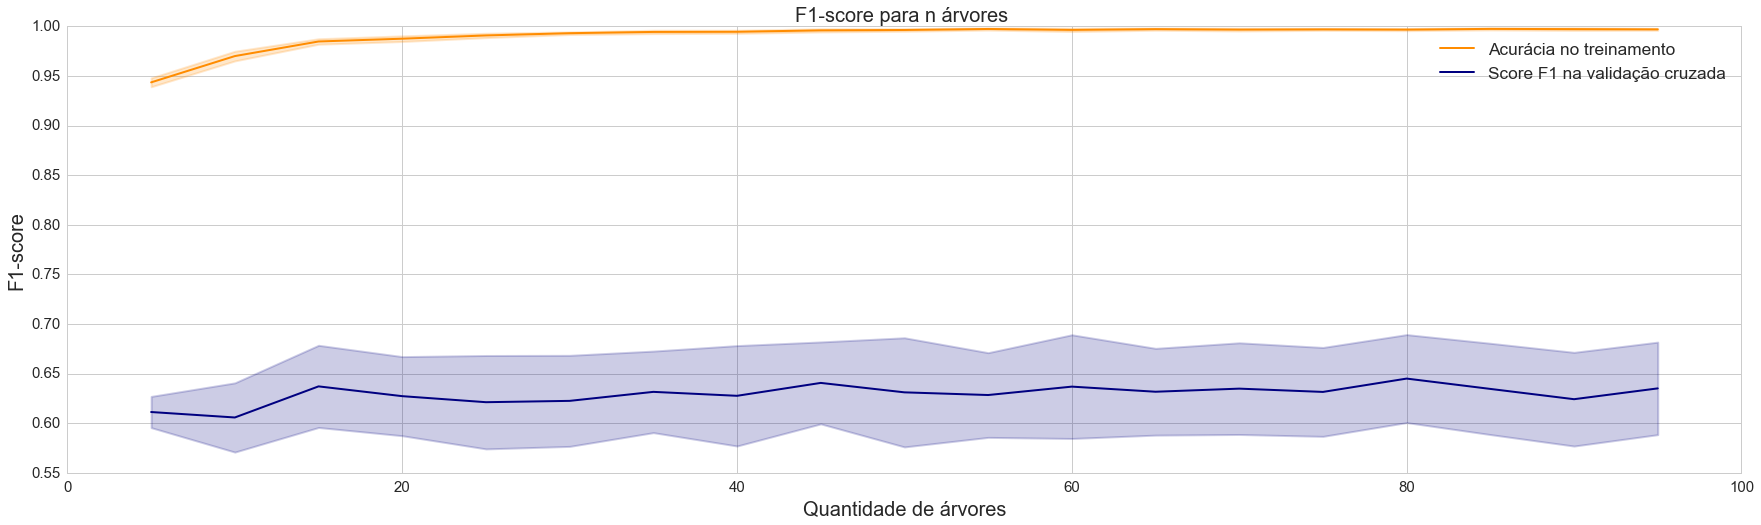

In [72]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [93]:
cross_val_desbal_f1_1 = cross_val_score(RF(n_estimators=20),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

[ 0.71428571  0.45614035  0.57142857  0.61971831  0.51724138  0.71186441
  0.75        0.62068966  0.68656716  0.71875   ]
0.636668555189


In [94]:
cross_val_desbal_f1_1 = cross_val_score(RF(n_estimators=80),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_1)
print(np.mean(cross_val_desbal_f1_1))

[ 0.72463768  0.42105263  0.63492063  0.67647059  0.56140351  0.75409836
  0.72        0.66666667  0.68571429  0.63636364]
0.648132799407


#### ROC-AUC

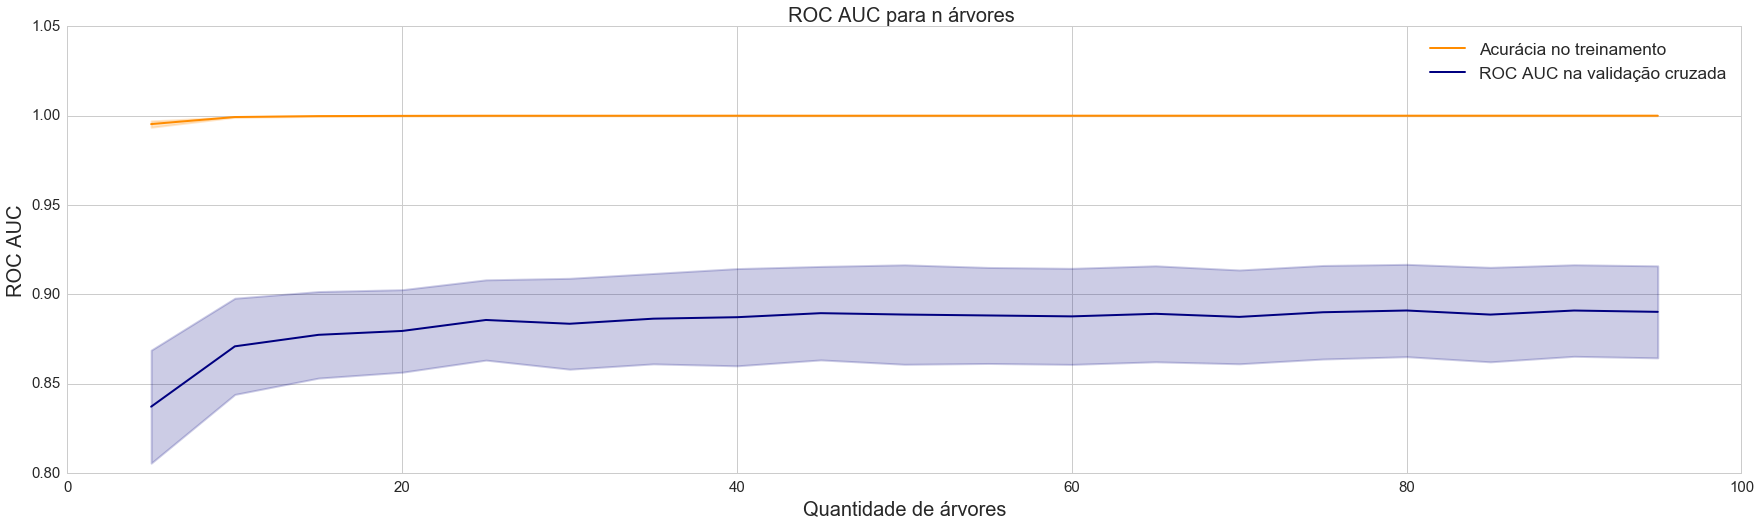

In [74]:
validation_graph_roc(model=RF(max_depth=25),X=conjunto1_train_desbalanceado,y=conjunto1_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='roc_auc',jobs=-1)

In [92]:
cross_val_desbal_roc_1 = cross_val_score(RF(n_estimators=20),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_1)
print(np.mean(cross_val_desbal_roc_1))

[ 0.90046296  0.84490741  0.84442008  0.85903996  0.84525565  0.92174463
  0.9380531   0.92250316  0.87496839  0.91959545]
0.887095079143


In [92]:
cross_val_desbal_roc_1 = cross_val_score(RF(n_estimators=80),conjunto1_test_desbalanceado,conjunto1_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_1)
print(np.mean(cross_val_desbal_roc_1))

[ 0.90046296  0.84490741  0.84442008  0.85903996  0.84525565  0.92174463
  0.9380531   0.92250316  0.87496839  0.91959545]
0.887095079143


### Dataset 2

#### F1-Score

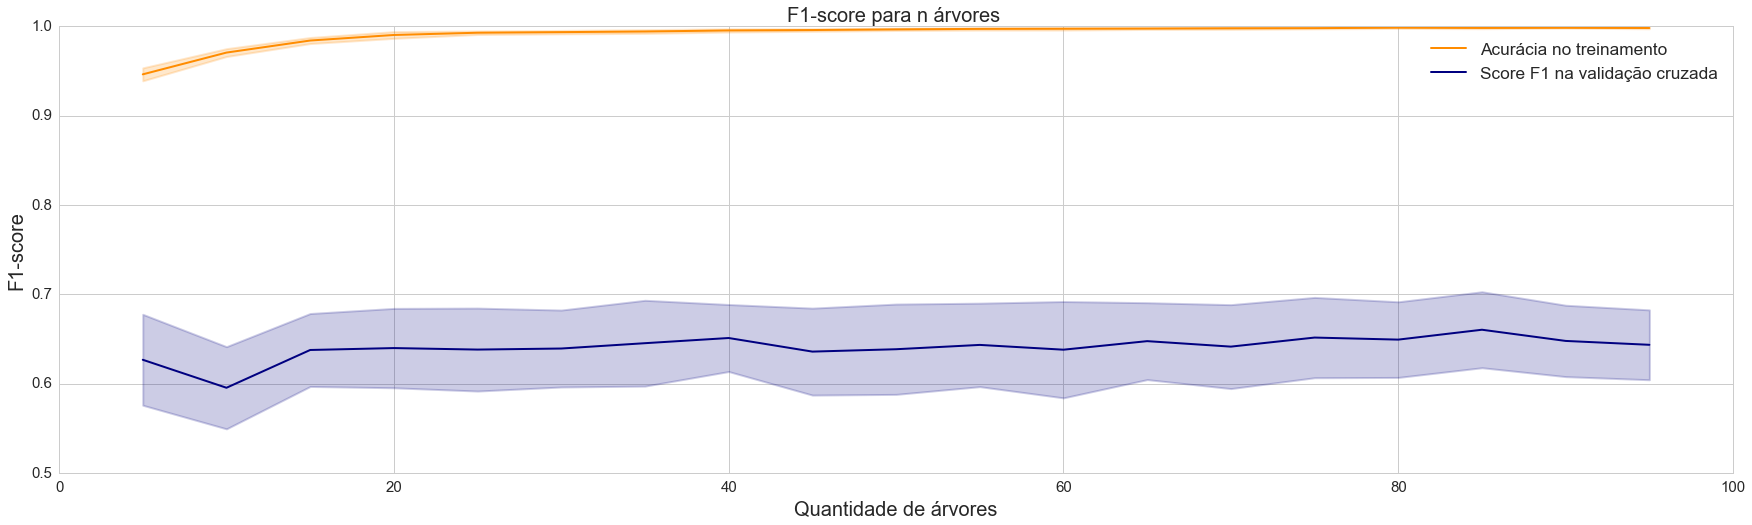

In [76]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto2_train_desbalanceado,y=conjunto2_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [96]:
cross_val_desbal_f1_2 = cross_val_score(RF(n_estimators=20),conjunto2_test_desbalanceado,conjunto2_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_2)
print(np.mean(cross_val_desbal_f1_2))

[ 0.67567568  0.61333333  0.48571429  0.58823529  0.58823529  0.6
  0.64864865  0.63013699  0.67647059  0.71875   ]
0.622520010614


In [95]:
cross_val_desbal_f1_2 = cross_val_score(RF(n_estimators=40),conjunto2_test_desbalanceado,conjunto2_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_2)
print(np.mean(cross_val_desbal_f1_2))

[ 0.66666667  0.61333333  0.55072464  0.63636364  0.67647059  0.64
  0.68571429  0.67532468  0.70588235  0.76056338]
0.661104355654


#### ROC-AUC

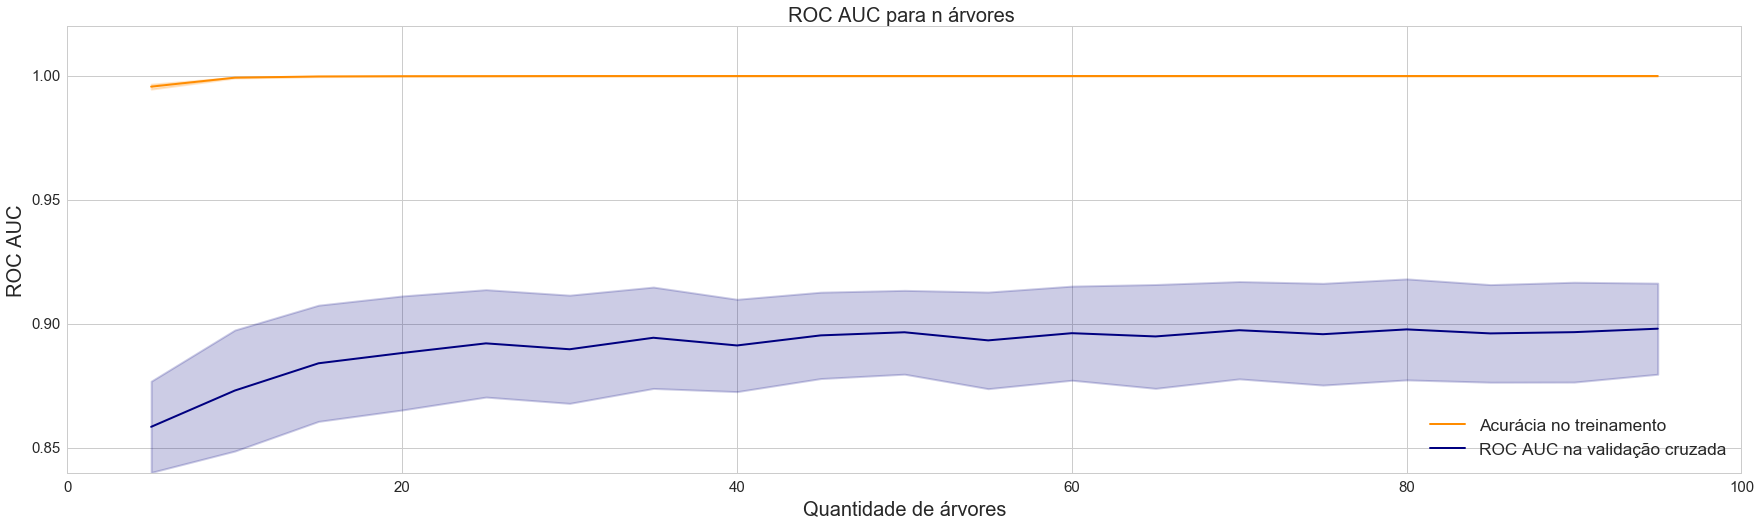

In [79]:
validation_graph_roc(model=RF(max_depth=25),X=conjunto2_train_desbalanceado,y=conjunto2_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='roc_auc',jobs=-1)

In [103]:
# acurácia no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(RF(n_estimators=20),conjunto2_test_desbalanceado,conjunto2_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)
print(np.mean(cross_val_desbal_roc_2))

[ 0.91963727  0.87314989  0.81655201  0.8928497   0.89617486  0.89029004
  0.89859185  0.8913409   0.8919327   0.92709232]
0.889761153568


In [104]:
# acurácia no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(RF(n_estimators=60),conjunto2_test_desbalanceado,conjunto2_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)
print(np.mean(cross_val_desbal_roc_2))

[ 0.91327913  0.88909735  0.82718366  0.89826975  0.90710383  0.88577133
  0.91551072  0.90941572  0.90002157  0.93798533]
0.89836383935


In [105]:
# acurácia no conjunto de teste
cross_val_desbal_roc_2 = cross_val_score(RF(n_estimators=80),conjunto2_test_desbalanceado,conjunto2_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_2)
print(np.mean(cross_val_desbal_roc_2))

[ 0.92338962  0.89086929  0.83479258  0.89722743  0.89974779  0.88366961
  0.91666667  0.89649012  0.89732528  0.93701467]
0.89771930634


### Dataset 3

#### F1-Score

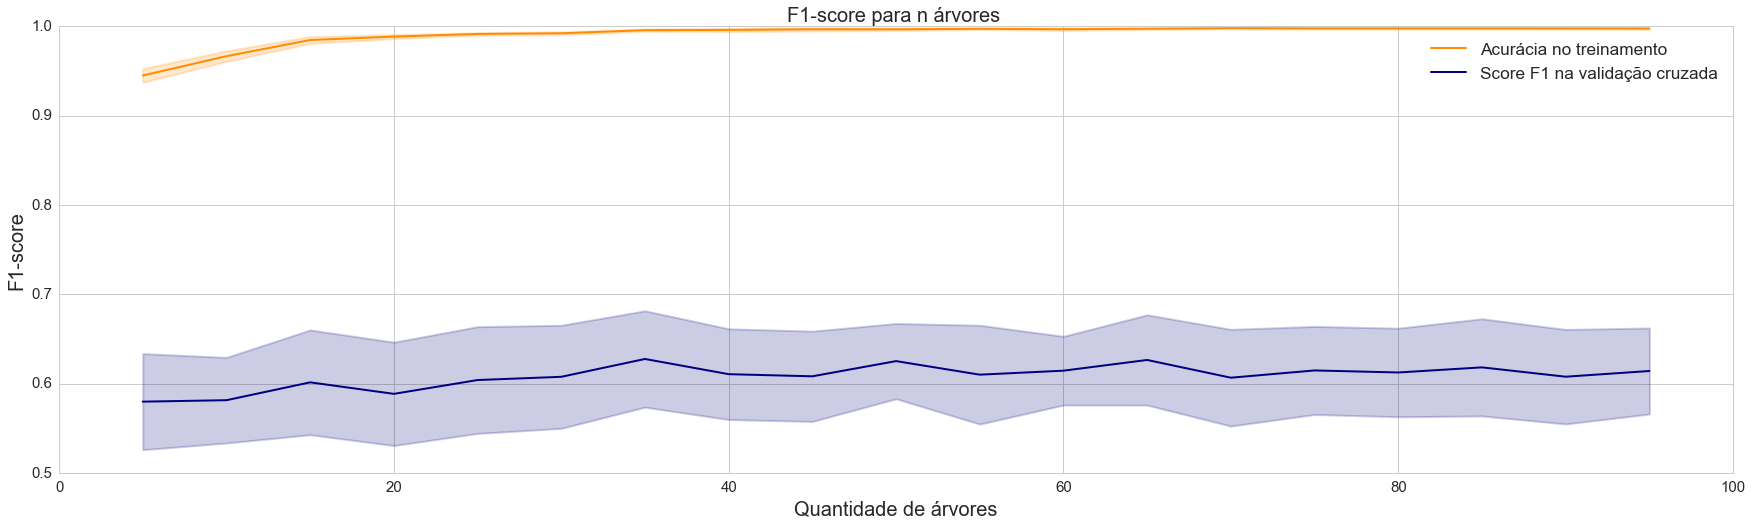

In [106]:
# Busca do melhor hiperparâmetro
validation_graph_f1(model=RF(max_depth=25),X=conjunto3_train_desbalanceado,y=conjunto3_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [111]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(RF(n_estimators=15),conjunto3_test_desbalanceado,conjunto3_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)
print(np.mean(cross_val_desbal_f1_3))

[ 0.55737705  0.62222222  0.57142857  0.62295082  0.6779661   0.52173913
  0.66666667  0.72727273  0.52        0.45833333]
0.594595662191


In [112]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(RF(n_estimators=35),conjunto3_test_desbalanceado,conjunto3_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)
print(np.mean(cross_val_desbal_f1_3))

[ 0.62068966  0.625       0.57692308  0.63333333  0.60714286  0.54166667
  0.62222222  0.67924528  0.61538462  0.53061224]
0.605221995476


In [113]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(RF(n_estimators=60),conjunto3_test_desbalanceado,conjunto3_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)
print(np.mean(cross_val_desbal_f1_3))

[ 0.64516129  0.63829787  0.56603774  0.59259259  0.64150943  0.53333333
  0.76923077  0.72727273  0.58823529  0.6       ]
0.630167104902


In [114]:
# acurácia no conjunto de teste
cross_val_desbal_f1_3 = cross_val_score(RF(n_estimators=80),conjunto3_test_desbalanceado,conjunto3_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_3)
print(np.mean(cross_val_desbal_f1_3))

[ 0.62068966  0.60869565  0.65454545  0.62068966  0.72727273  0.53333333
  0.68085106  0.71698113  0.54166667  0.56      ]
0.626472534024


#### ROC-AUC

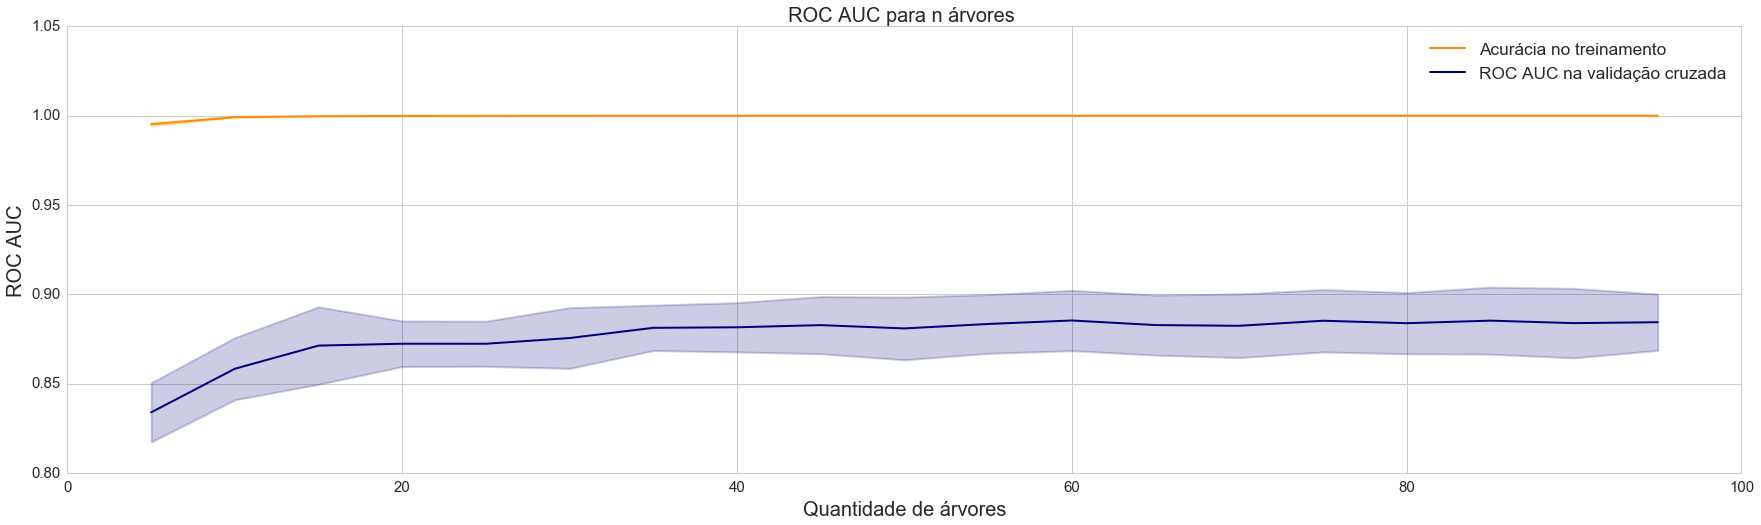

In [115]:
validation_graph_roc(model=RF(max_depth=25),X=conjunto3_train_desbalanceado,y=conjunto3_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='roc_auc',jobs=-1)

In [119]:
cross_val_desbal_roc_3 = cross_val_score(RF(n_estimators=20),conjunto3_test_desbalanceado,conjunto3_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)
print(np.mean(cross_val_desbal_roc_3))

[ 0.88505747  0.89565993  0.87812128  0.86147444  0.90219976  0.89670036
  0.91290131  0.9334126   0.88926873  0.87381094]
0.892860681728


In [120]:
cross_val_desbal_roc_3 = cross_val_score(RF(n_estimators=40),conjunto3_test_desbalanceado,conjunto3_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)
print(np.mean(cross_val_desbal_roc_3))

[ 0.89626437  0.89580856  0.8754459   0.86846017  0.91542806  0.86058264
  0.94574911  0.94129013  0.86741974  0.89536266]
0.896181133571


In [121]:
cross_val_desbal_roc_3 = cross_val_score(RF(n_estimators=80),conjunto3_test_desbalanceado,conjunto3_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_3)
print(np.mean(cross_val_desbal_roc_3))

[ 0.8987069   0.90428062  0.89610583  0.85760999  0.9010107   0.86028537
  0.94946492  0.9411415   0.88198573  0.88689061]
0.897748216409


### Dataset 4

#### F1-Score

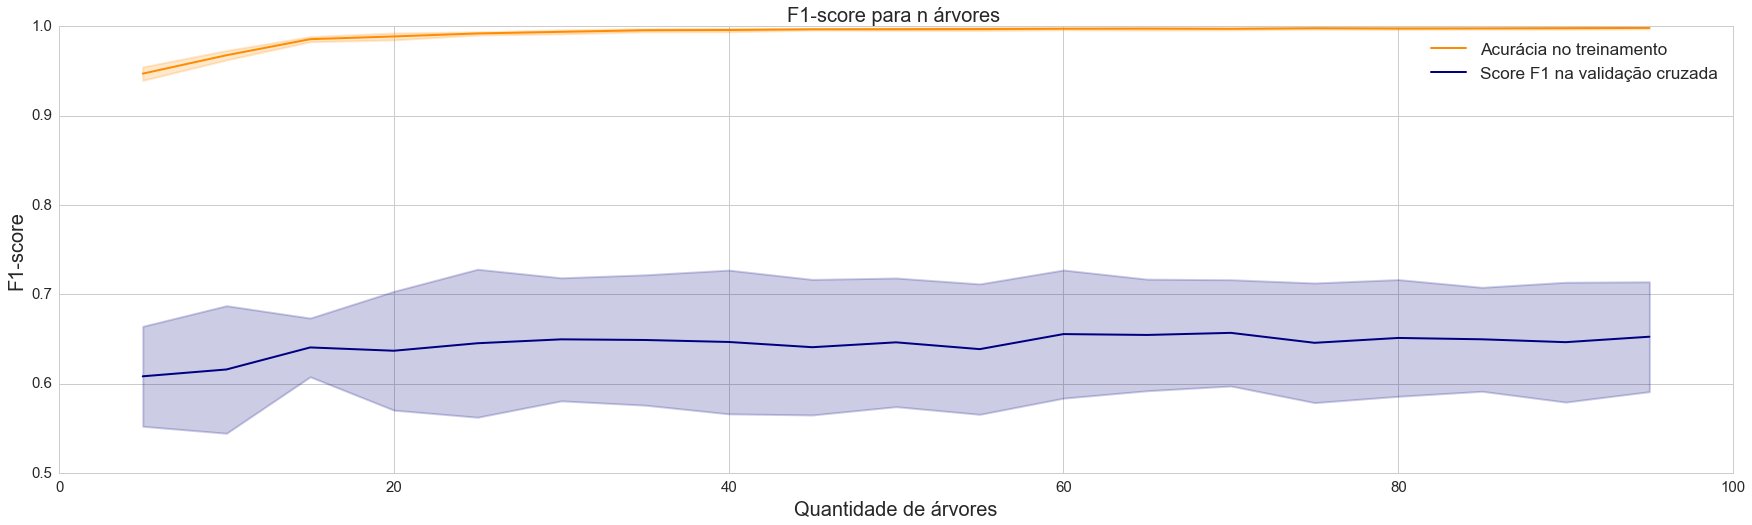

In [122]:
validation_graph_f1(model=RF(max_depth=25),X=conjunto4_train_desbalanceado,y=conjunto4_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='f1',jobs=-1)

In [124]:
cross_val_desbal_f1_4 = cross_val_score(RF(n_estimators=20),conjunto4_test_desbalanceado,conjunto4_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.59259259  0.58823529  0.62222222  0.57692308  0.6         0.74509804
  0.50980392  0.63829787  0.61538462  0.66666667]
0.615522430103


In [125]:
cross_val_desbal_f1_4 = cross_val_score(RF(n_estimators=40),conjunto4_test_desbalanceado,conjunto4_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.60714286  0.6122449   0.63829787  0.64285714  0.57692308  0.72
  0.64285714  0.60869565  0.57142857  0.6       ]
0.622044721368


In [126]:
cross_val_desbal_f1_4 = cross_val_score(RF(n_estimators=60),conjunto4_test_desbalanceado,conjunto4_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.59259259  0.65384615  0.56521739  0.53846154  0.62745098  0.66666667
  0.63157895  0.6122449   0.58823529  0.66666667]
0.614296112938


In [127]:
cross_val_desbal_f1_4 = cross_val_score(RF(n_estimators=80),conjunto4_test_desbalanceado,conjunto4_test_target_desbalanceado.earnings,cv=10,scoring='f1')
print(cross_val_desbal_f1_4)
print(np.mean(cross_val_desbal_f1_4))

[ 0.61818182  0.61818182  0.625       0.58181818  0.62962963  0.68085106
  0.59259259  0.58333333  0.54901961  0.7037037 ]
0.618231174911


#### ROC-AUC

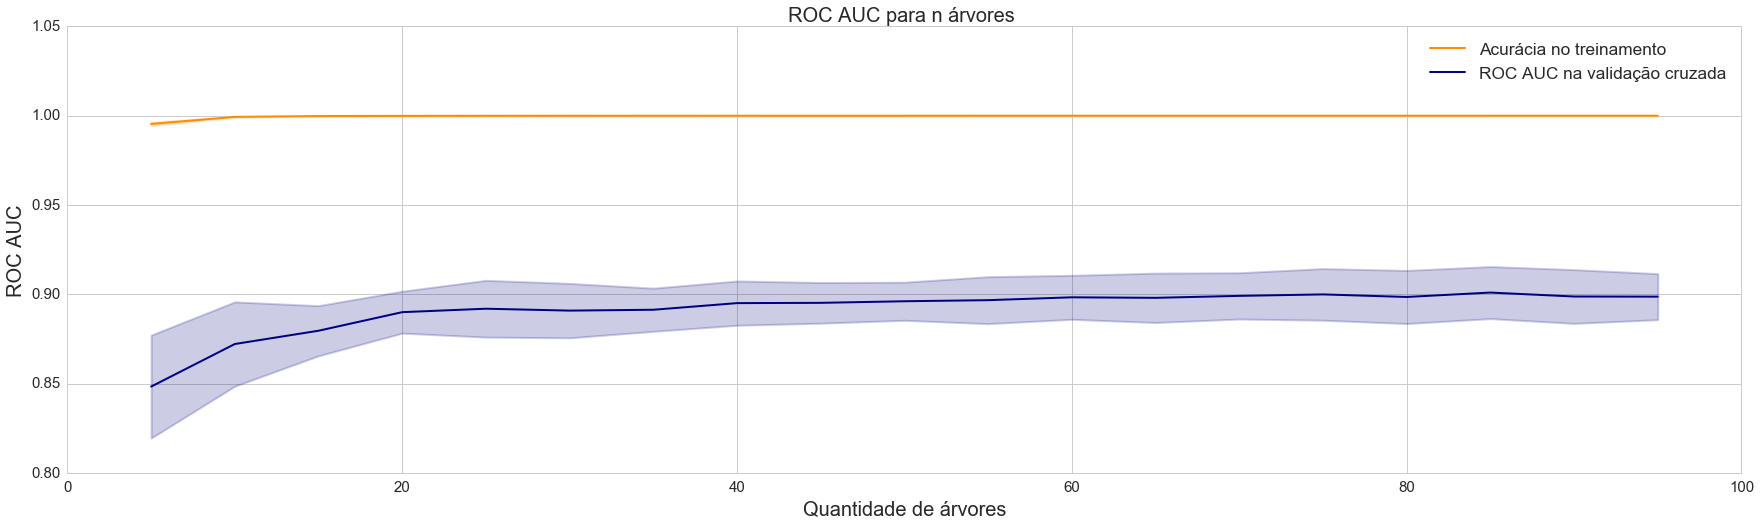

In [128]:
validation_graph_roc(model=RF(max_depth=25),X=conjunto4_train_desbalanceado,y=conjunto4_train_target_desbalanceado.earnings,hyperparameter='n_estimators',
                 grid_search=list(range(5,100,5)),k_folds=10,score='roc_auc',jobs=-1)

In [129]:
cross_val_desbal_roc_4 = cross_val_score(RF(n_estimators=20),conjunto4_test_desbalanceado,conjunto4_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.86061876  0.88785047  0.87383178  0.83854335  0.85417338  0.90331937
  0.83580406  0.86368031  0.79407025  0.90960361]
0.86214953271


In [130]:
cross_val_desbal_roc_4 = cross_val_score(RF(n_estimators=40),conjunto4_test_desbalanceado,conjunto4_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.85836287  0.8926845   0.8978408   0.85514019  0.88720593  0.9086368
  0.85836287  0.86803094  0.83274251  0.90944248]
0.876844988721


In [131]:
cross_val_desbal_roc_4 = cross_val_score(RF(n_estimators=60),conjunto4_test_desbalanceado,conjunto4_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.86029649  0.89236223  0.89332904  0.85368998  0.88430551  0.91153722
  0.85787947  0.8781824   0.82371898  0.90895907]
0.876426039317


In [132]:
cross_val_desbal_roc_4 = cross_val_score(RF(n_estimators=80),conjunto4_test_desbalanceado,conjunto4_test_target_desbalanceado.earnings,cv=10,scoring='roc_auc')
print(cross_val_desbal_roc_4)
print(np.mean(cross_val_desbal_roc_4))

[ 0.86641959  0.89461811  0.89461811  0.86255237  0.88978408  0.90638092
  0.87834354  0.87238157  0.83000322  0.92297776]
0.881807927812


### Avaliação dos modelos para cada cenário

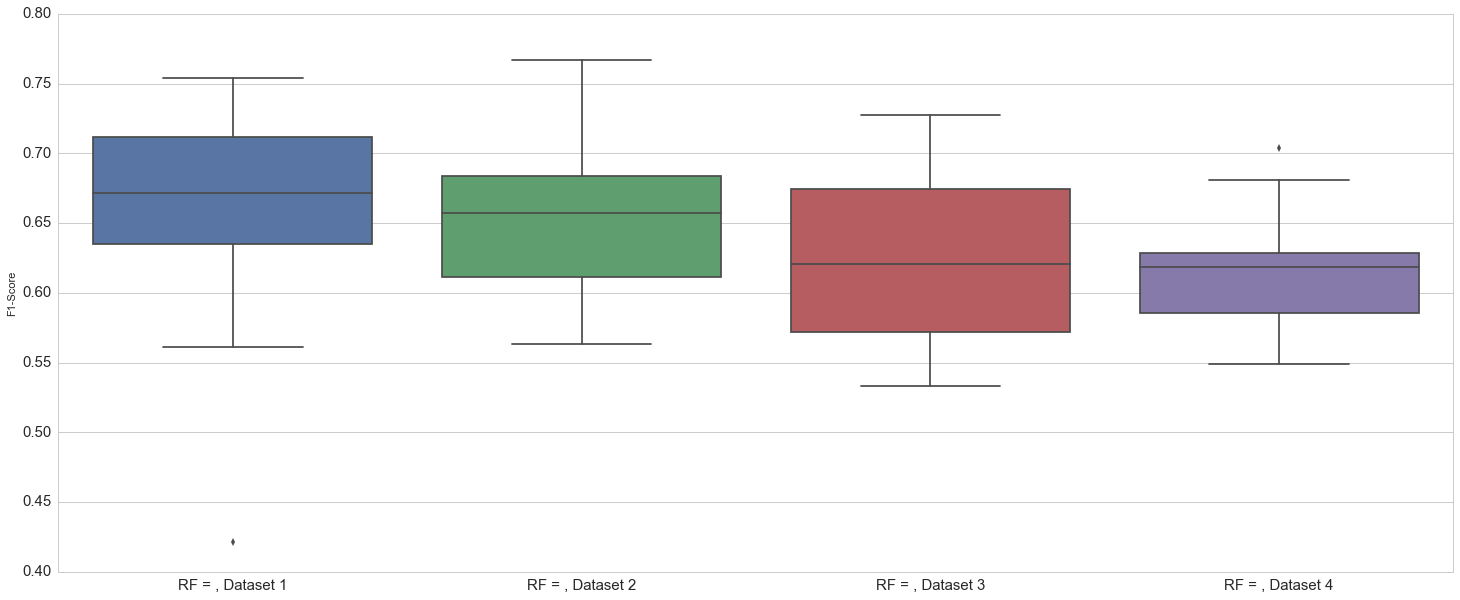

In [133]:
modelos_desbalanceados = [cross_val_desbal_f1_1, cross_val_desbal_f1_2, cross_val_desbal_f1_3, cross_val_desbal_f1_4]
labels = ['RF = , Dataset 1', 'RF = , Dataset 2', 'RF = , Dataset 3', 'RF = , Dataset 4']
plt.figure(figsize=(25,10))
sns.boxplot(data=modelos_desbalanceados)
plt.xticks(list(range(0,4)),labels,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('F1-Score')
plt.show()

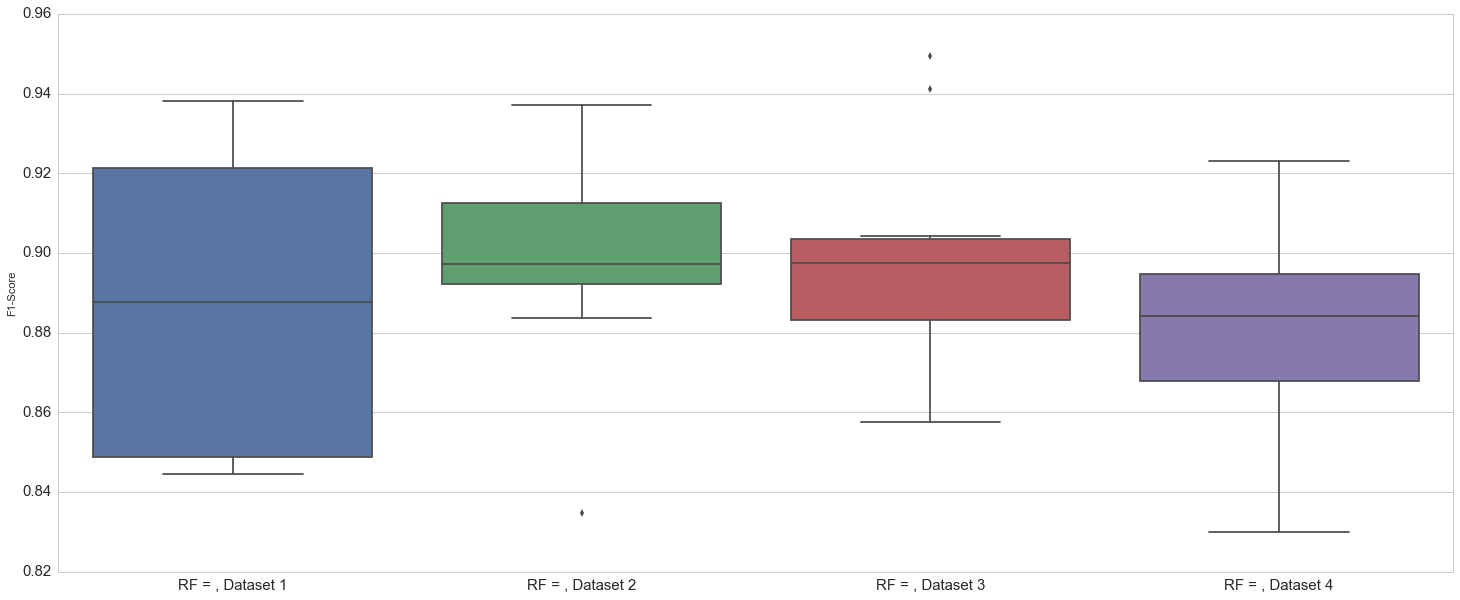

In [135]:
modelos_desbalanceados = [cross_val_desbal_roc_1, cross_val_desbal_roc_2, cross_val_desbal_roc_3, cross_val_desbal_roc_4]
labels = ['RF = , Dataset 1', 'RF = , Dataset 2', 'RF = , Dataset 3', 'RF = , Dataset 4']
plt.figure(figsize=(25,10))
sns.boxplot(data=modelos_desbalanceados)
plt.xticks(list(range(0,4)),labels,fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('F1-Score')
plt.show()